In [6]:
IN_LINE_MODE = False

%matplotlib inline

    
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import fastdtw
from utils import *
from main import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DEMO 1

non vectorized - will plot all the alignments from dtw

In this example the code aligns the "Fx" variable from timeseries on indices in data pair

In [2]:
%matplotlib inline
data_pair = (1,4)
valmatrix1, valmatrix2 = load_data_from_tuple(data_pair)
distance, paired, ts1, ts2 = compute_dtw(valmatrix1[:, 1], valmatrix2[:, 1], valmatrix1[:, 2], valmatrix2[:, 2])
plot_dtw(valmatrix1[:, 2], valmatrix2[:, 2], valmatrix1[:, 1], valmatrix2[:, 1])

vectorized - plots unique alignments for the shorter signal - maybe less pretty but it is used as visualization default for the sake of faster run of the program

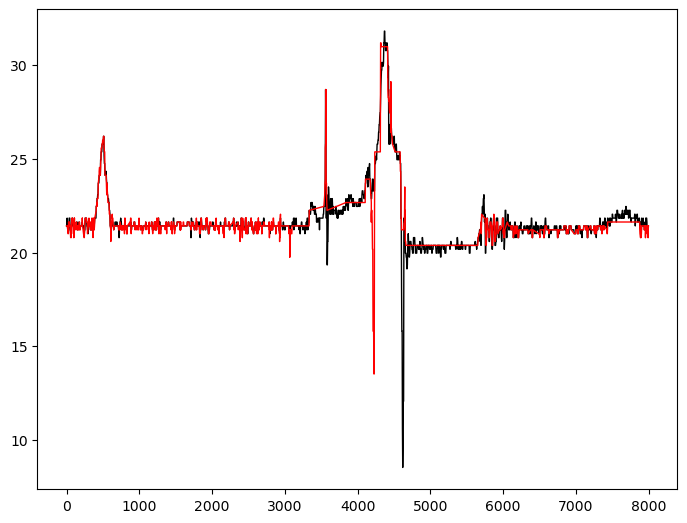

In [44]:
%matplotlib inline
distance, paired, ts1, ts2 = compute_dtw(valmatrix1[:, 1], valmatrix2[:, 1], valmatrix1[:, 2], valmatrix2[:, 2])
fig = plt.figure()
axis = fig.add_axes([0, 0, 1, 1])
m = plot_dtw_vec(ts1, ts2, paired, distance, axes=axis, time = 0, variable=1)

## DEMO 2

This code takes two signals (indices in data_pair) and computes n-dimensional dtw across all variables. It plots the result in matplotlib window.

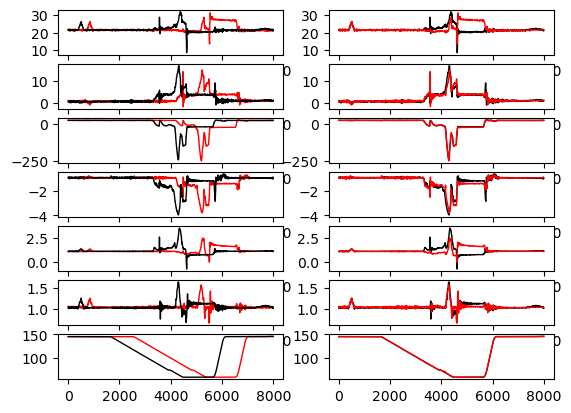

In [52]:
%matplotlib inline
data_pair = (3,4)
valmatrix1, valmatrix2 = load_data_from_tuple(data_pair)
#compute_multivar_dtw(valmatrix1, valmatrix2, fast = True)
compare_signals(valmatrix1, valmatrix2, fast = False)

## Demo 3 - crossval

This code simulates crossvalidation of signal to a signal randomly selected from dataset.
It should simulate the real time computation. In this version it only plots the results in matplotlib window.
The animation does not work in jupyter notebook, only in matplotlib window.

In [46]:
%matplotlib qt
i = 0
step_size = 100
data_tuple = [1, 2, 3, 4]
rand_sig = data_tuple.pop(np.random.randint(0, len(data_tuple)))
print(f"Comparing signal: {rand_sig}")
TS1 = load_data_from_tuple((rand_sig, ))[0]
signals = load_data_from_tuple(data_tuple)
cross_validate_signals(TS1, signals, rand_sig, step_size=50, chosen_int=-1)


Comparing signal: 2
To signal: 3


KeyboardInterrupt: 